# Programming Assignment

* Author: Laxman Desai ($190020066$)
* Course: CL $202$ (Data Analysis)
* Date: $20^{th}$ April $2021$

## Initialization

$Z_1$ = Total dwelling space ($100\ ft^2$)  
$Z_2$ = Assessed value ($\$1000$)  
$Y$ = Selling price ($\$1000$)

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset/data.csv')
df['Z1'] *= 100 # Scaling
df['Z2'] *= 1000 # Scaling
df['Y'] *= 1000 # Scaling

df.head()

,Z1,Z2,Y
0,1531.0,57300.0,74800.0
1,1520.0,63800.0,74000.0
2,1625.0,65400.0,72900.0
3,1433.0,57000.0,70000.0
4,1457.0,63800.0,74900.0


## A) Correlation Coefficient

In [2]:
display(df.corr())

corr_coeff_Y_Z1 = df['Y'].corr(df['Z1'])
print(f'corr_coeff_Y_Z1 = {round(corr_coeff_Y_Z1, 4)}')

corr_coeff_Y_Z2 = df['Y'].corr(df['Z2'])
print(f'corr_coeff_Y_Z2 = {round(corr_coeff_Y_Z2, 4)}')

,Z1,Z2,Y
Z1,1.000000,0.925711,0.913319
Z2,0.925711,1.000000,0.851384
Y,0.913319,0.851384,1.000000


corr_coeff_Y_Z1 = 0.9133
corr_coeff_Y_Z2 = 0.8514


## B) Linear Model

Y = a\*Z1 + b\*Z2 + c

In [3]:
X = df.drop('Y', axis=1) # Independant Variables
y = df['Y'] # Dependant Variables

N = len(X)
print(f'No. of training samples = {N}')

p = len(X.columns) + 1  # '+1' because LinearRegression adds an intercept term
print(f'No. of regression coefficients = {p}, i.e. Y = a*Z1 + b*Z2 + c*1')

No. of training samples = 20
No. of regression coefficients = 3, i.e. Y = a*Z1 + b*Z2 + c*1


In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

a, b = model.coef_
c = model.intercept_

print(f'a = {round(a, 5)}, b = {round(b, 5)}, c = {round(c, 5)}')

a = 26.344, b = 0.04518, c = 30966.56634


## C) $95\%$ Confidence Interval

ci_l_a < a < ci_u_a  
ci_l_b < b < ci_u_b  
ci_l_c < c < ci_u_c

In [5]:
y_hat = model.predict(X)
err = y - y_hat # residual

RSS = err.T @ err # dot product, equivalent to sum(err**2)
print(f'Residual sum of squares = {round(RSS, 6)}')

S = np.sqrt(RSS / (N - p))
print(f'Standard deviation of y_hat = {S}')

Residual sum of squares = 204994944.947883
Standard deviation of y_hat = 3472.5388656435357


In [18]:
# M = matrix (20 x 3) with columns as [Z1, Z2, 1]  
M = np.ones(shape=(N, p), dtype=float)
M[:, 0] = X.iloc[:, 0]
M[:, 1] = X.iloc[:, 1]

display(M[0:5]) # Equivalent to M.head() for non dataframes

array([[1.531e+03, 5.730e+04, 1.000e+00],
       [1.520e+03, 6.380e+04, 1.000e+00],
       [1.625e+03, 6.540e+04, 1.000e+00],
       [1.433e+03, 5.700e+04, 1.000e+00],
       [1.457e+03, 6.380e+04, 1.000e+00]])

In [7]:
var_beta_hat = 1/(M.T @ M) * S**2 # Varience of beta hat

std_err_a = var_beta_hat[0, 0] ** 0.5
print(f'Standard Error of a = {std_err_a}')

std_err_b = var_beta_hat[1, 1] ** 0.5
print(f'Standard Error of b = {std_err_b}')

std_err_c = var_beta_hat[2, 2] ** 0.5
print(f'Standard Error of c = {std_err_c}')

Standard Error of a = 0.47258255944417654
Standard Error of b = 0.012232992294284532
Standard Error of c = 776.4832958088955


In [8]:
from statistics import NormalDist

z = NormalDist().inv_cdf((1 + 0.95) / 2.) # 95% CI
print(f'z for 95% CI = {z}')

z for 95% CI = 1.9599639845400536


In [27]:
# 95% CI Lower Bounds
ci_l_a = a - z * std_err_a
ci_l_b = b - z * std_err_b
ci_l_c = c - z * std_err_c

# 95% CI Upper Bounds
ci_u_a = a + z * std_err_a
ci_u_b = b + z * std_err_b
ci_u_c = c + z * std_err_c

print(f'a ∈ [{round(ci_l_a, 6)}, {round(ci_u_a, 6)}]' )
print(f'b ∈ [{round(ci_l_b, 6)}, {round(ci_u_b, 6)}]' )
print(f'c ∈ [{round(ci_l_c, 6)}, {round(ci_u_c, 6)}]' )

a ∈ [25.417751, 27.270241]
b ∈ [0.021208, 0.06916]
c ∈ [29444.687041, 32488.445629]


### Plotting the data:

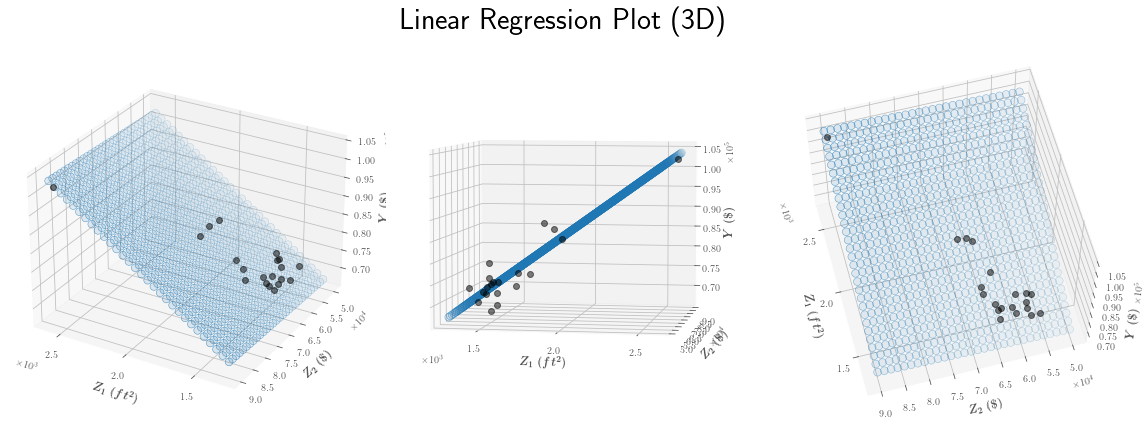

In [59]:
# Plotting the linear model
# %matplotlib ipympl
%matplotlib inline
import matplotlib.pyplot as plt

# Initialize matplotlib 
plt.style.use('ggplot')
plt.rc('text', usetex=True) # Unnecessary
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
plt.rcParams['grid.color'] = '#C0C0C0'

# Creating figures
fig = plt.figure(figsize=(16, 6))
fig.set_facecolor('#FFFFFF')

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')
ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=5, azim=-80)
ax3.view_init(elev=60, azim=165)
axes = [ax1, ax2, ax3]

# Create regression grid
x_plot = np.linspace(1300, 2600, 30)   # range of Z1 to plot
y_plot = np.linspace(50000, 90000, 30)  # range of Z2 to plot
x_mesh, y_mesh = np.meshgrid(x_plot, y_plot)

model_viz = np.array([x_mesh.flatten(), y_mesh.flatten()]).T
y_hat_plot = model.predict(model_viz)

# Creating plot
for ax in axes:
    ax.plot(df['Z1'], df['Z2'], df['Y'], color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(x_mesh, y_mesh, y_hat_plot, s=60, facecolor='#1F77B422', edgecolor='#1F77B4cc')
    
    ax.set_xlabel(r'$\boldsymbol{Z_1\ (ft^2)}$', fontsize=12)
    ax.set_ylabel(r'$\boldsymbol{Z_2\ (\$)}$', fontsize=12)
    ax.set_zlabel(r'$\boldsymbol{Y\ (\$)}$', fontsize=12)
    
    ax.set_facecolor('#FFFFFF')
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=4, axis='x')
    ax.ticklabel_format(style="sci", scilimits=(0, 0), useMathText=True)

fig.suptitle('Linear Regression Plot (3D)', fontsize=30)
fig.tight_layout(pad=1.5)

# plt.savefig('Linear Regression Plot.png')

## D) $95\%$ Prediction Interval

- Apartment size = 12 \* 100 ft2 and assessed value of 60 * 1000$  
- pi_l_Y < pi_u < pi_u_Y

In [29]:
X_test = [[1200, 60000]]

y_test_hat = model.predict(X_test)[0]
print(f'Predicted selling price = {round(y_test_hat, 2)}$')

Predicted selling price = 65290.39$


In [30]:
pi_l_Y = y_test_hat - z * S
pi_u_Y = y_test_hat + z * S
print(f'lower value bound = {pi_l_Y}, upper value bound = {pi_u_Y}')

lower value bound = 58484.342340221294, upper value bound = 72096.4445633751


## E) Mean & varience of residuals

In [31]:
mean_resid = err.mean()
print(f'mean of residual = {mean_resid}')

var_resid = err.var()
print(f'varience of residual = {var_resid}')

mean of residual = 4.365574568510055e-12
varience of residual = 10789207.628835956


## F) $R^2$ of the fit

In [32]:
y_diff = y - y.mean()
TSS = y_diff.T @ y_diff   

Rsq = 1 - RSS/TSS
print(f'R^2 of the fit (calculated) = {Rsq}')

R^2 of the fit (calculated) = 0.8343970328484549


In [33]:
# Confirming using sklearn's builtin method
from sklearn.metrics import r2_score
print(f'R^2 of the fit (using builtin methods) = {r2_score(y, y_hat)}')

R^2 of the fit (using builtin methods) = 0.8343970328484549


References: [1](https://stackoverflow.com/questions/53519823/confidence-interval-in-python-dataframe) [2](https://gist.github.com/grisaitis/cf481034bb413a14d3ea851dab201d31#file-stackoverflow_question_22381497-ipynb) [3](https://machinelearningmastery.com/prediction-intervals-for-machine-learning/) [4](https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python)